## DATA ANALYSIS USING JUPYTER LAB AND FRED API

A random project working with data from the Federal Reserve Economic Data (FRED) [website](https://fred.stlouisfed.org/). 

It is necessary to obtain a FRED api from the FRED website and, for that, a FRED account is required. The alternative to that is to manually import data from the website.

The process of obtaining the FRED api is fairly straight-forward and is well documented on the FRED website. it is of great importance to safeguard one's api once obtained as it is linked directly to one's account.


### Import required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from fredapi import Fred

plt.style.use('ggplot')
pd.set_option('display.max_columns',500)


### Load environment variable to read hidden api key

In [3]:
%load_ext dotenv
%dotenv
import os

In [4]:
Fred_key = os.getenv("FRED_API")

### Create the fred object

In [5]:
fred = Fred(api_key=Fred_key)

### Importing data using the fred object method - .get_series()

In [6]:
Sticky =fred.get_series(series_id='CPIAUCSL')

<AxesSubplot: >

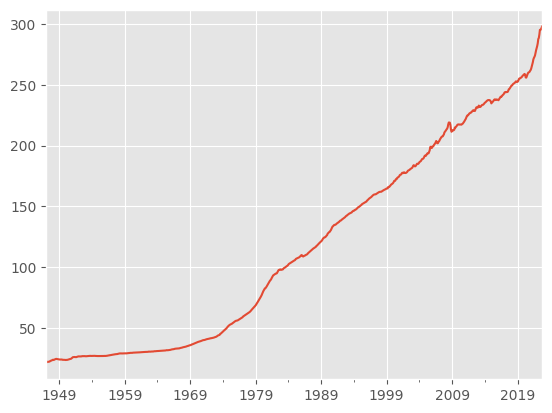

In [7]:
Sticky.plot()

### Import unemployment data

In [45]:
unemployment_data = fred.get_series(series_id='UNRATE', observation_start = '2019/1/1')
unemployment_data.name = 'unemployment_data'

In [46]:
unemployment_data.head()

2019-01-01    4.0
2019-02-01    3.8
2019-03-01    3.8
2019-04-01    3.6
2019-05-01    3.6
Name: unemployment_data, dtype: float64

<AxesSubplot: >

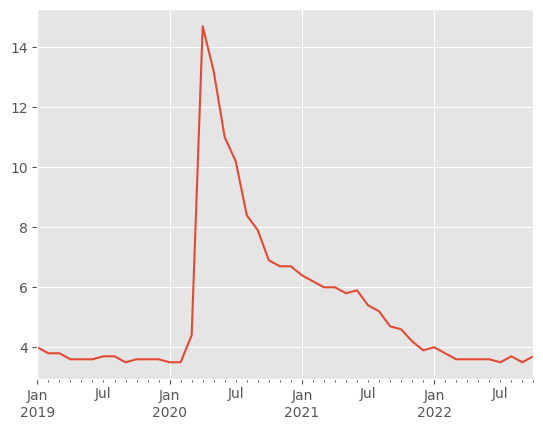

In [10]:
unemployment_data.plot()

In [11]:
### At the time of this project. the inflation data points were one less
#unemployment_data = unemployment_data.iloc[0:45]

In [47]:
unemployment_data.info()


<class 'pandas.core.series.Series'>
DatetimeIndex: 46 entries, 2019-01-01 to 2022-10-01
Series name: unemployment_data
Non-Null Count  Dtype  
--------------  -----  
46 non-null     float64
dtypes: float64(1)
memory usage: 736.0 bytes


### Import inflation data

In [13]:
mcpi = fred.get_series('MEDCPIM158SFRBCLE', observation_start='2019/1/1')
mcpi.name = 'mcpi'

In [ ]:
mcpi.info()

In [40]:
### Summary statistics
mcpi.describe()

count    46.000000
mean      3.944187
std       2.145744
min       0.746659
25%       2.508617
50%       3.084628
75%       5.710775
max       9.222973
Name: mcpi, dtype: float64

In [15]:
mcpi.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 46 entries, 2019-01-01 to 2022-10-01
Series name: mcpi
Non-Null Count  Dtype  
--------------  -----  
46 non-null     float64
dtypes: float64(1)
memory usage: 736.0 bytes


<AxesSubplot: >

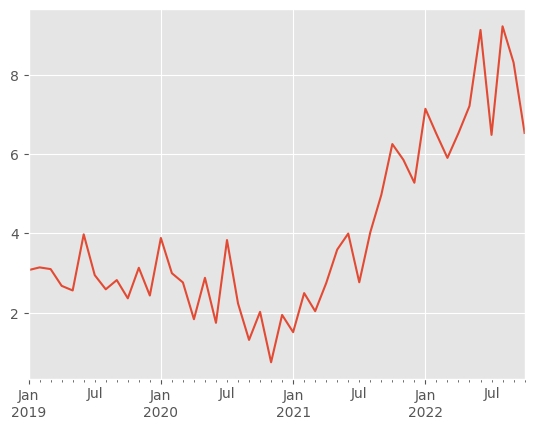

In [48]:
mcpi.plot()

### Merge data

In [17]:
unemp_mcpi = pd.merge(unemployment_data, mcpi, left_index =True, right_index = True)

In [18]:
unemp_mcpi.head(10)

,unemployment_data,mcpi
2019-01-01,4.0,3.071992
2019-02-01,3.8,3.140338
2019-03-01,3.8,3.097265
2019-04-01,3.6,2.674742
2019-05-01,3.6,2.558535
2019-06-01,3.6,3.974728
2019-07-01,3.7,2.945348
2019-08-01,3.7,2.587546
2019-09-01,3.5,2.820512
2019-10-01,3.6,2.360034


### Combined graph plot

<Figure size 1500x500 with 0 Axes>

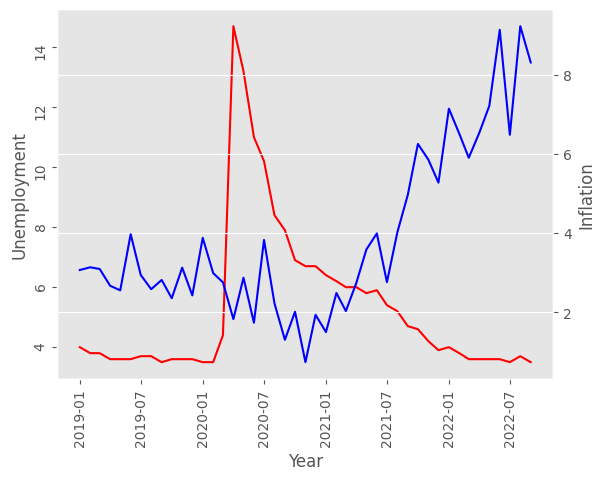

In [49]:
plt.figure(figsize=(15,5))
fig,ax = plt.subplots()
ax.plot(unemp_mcpi.index,
        unemp_mcpi.unemployment_data,
        color="red")
ax.tick_params(labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment')
ax2=ax.twinx()
ax2.plot(unemp_mcpi.index, unemp_mcpi.mcpi,
         color="blue")
ax2.set_ylabel('Inflation')
ax.grid(False)
plt.show()

### The Phillips Curve

The Phillips curve is an economic theory that inflation and unemployment have a stable and inverse relationship. Disproved in the 1970s during a time of stagflation - high unemployment and high inflation.

[Text(0.5, 0, 'Unemployment'),
 Text(0, 0.5, 'Core Inflation'),
 Text(0.5, 1.0, 'Inflation - Unempolyment')]

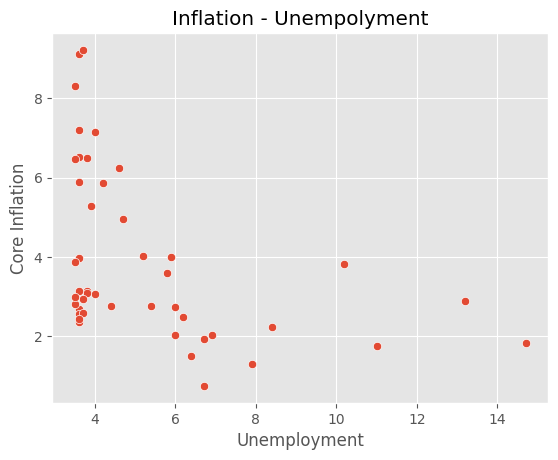

In [25]:
graph=sns.scatterplot(x='unemployment_data', y='mcpi', data =unemp_mcpi)
graph.set(xlabel = 'Unemployment', ylabel = 'Core Inflation', title = 'Inflation - Unempolyment')